# Exploratory Data Analysis

- Cloud top height product: note that these are NOAA L2 product, so the horizontal resolution is 5 km instead of 1 km. “HT” is the variable to use and “DQF==0” should be the quality flag to use.
- ABI Imagery: extracting from the CSS directory for now. Will add a section to do it from AWS. 
- Convective Masks: masks provided by Greg

In [12]:
import xarray as xr
import rioxarray as rxr
from glob import glob

## Define Paths to use for the same time

In [54]:
# cloud top height
cth_filename = '/explore/nobackup/projects/pix4dcloud/jgong/ACHA_L2_ABI_GOES16/2020/001/00/OR_ABI-L2-ACHAF-M6_G16_s20200010000216_e20200010009524_c20200010011461.nc'
# abi radiance
abi_filename_regex = '/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2020/001/00/OR_ABI-L1b-RadF-M6C*_G16_s20200010000216_e20200010009524_*.nc'
# convective mask
convection_filename = '/explore/nobackup/projects/pix4dcloud/Jingbo/cloudsystem_mask_2019-2020/20200101_cloudsystems.nc'

## Cloud top height product

In [20]:
xds = xr.open_dataset(cth_filename, engine="rasterio")
xds

<xarray.Dataset>
Dimensions:                 (band: 1, x: 1086, y: 1086)
Coordinates:
  * band                    (band) int64 1
  * x                       (x) float64 -5.436e+06 -5.426e+06 ... 5.436e+06
  * y                       (y) float64 5.436e+06 5.426e+06 ... -5.436e+06
    goes_imager_projection  int64 ...
Data variables:
    HT                      (band, y, x) float32 ...
    DQF                     (band, y, x) float32 ...
Attributes: (12/29)
    cdm_data_type:             Image
    Conventions:               CF-1.7
    dataset_name:              OR_ABI-L2-ACHAF-M6_G16_s20200010000216_e202000...
    date_created:              2020-01-01T00:11:46.1Z
    id:                        a9688385-e0ed-4147-9185-4a349d664ba2
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    ...                        ...
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    summary:                   The Cloud Top Height product consists of the h...
    timeline_id:               ABI Mode 6
    time_coverage_end:         2020-01-01T00:09:52.4Z
    time_coverage_start:       2020-01-01T00:00:21.6Z
    title:                     ABI L2 Cloud Top Height

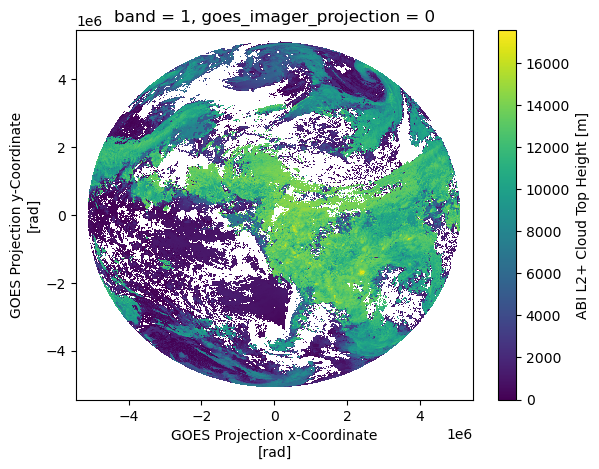

In [21]:
xds['HT'].plot()

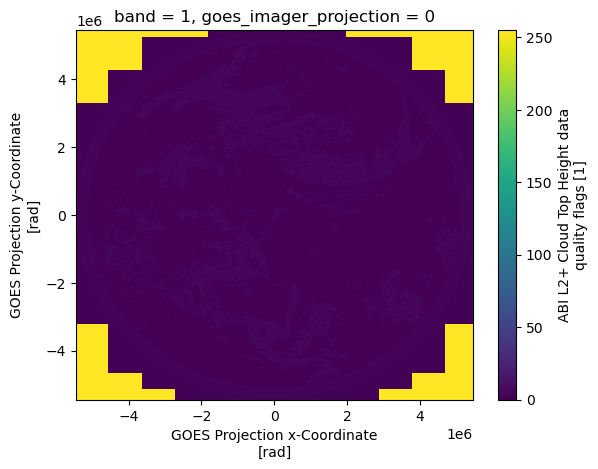

In [22]:
xds['DQF'].plot()

(array([190119.,  53214.,  37075.,  37257.,  37843.,  60098.,  92782.,
        102957.,  12862.,    287.]),
 array([    0.        ,  1755.28747559,  3510.57495117,  5265.86230469,
         7021.14990234,  8776.4375    , 10531.72460938, 12287.01269531,
        14042.29980469, 15797.58789062, 17552.875     ]),
 <BarContainer object of 10 artists>)

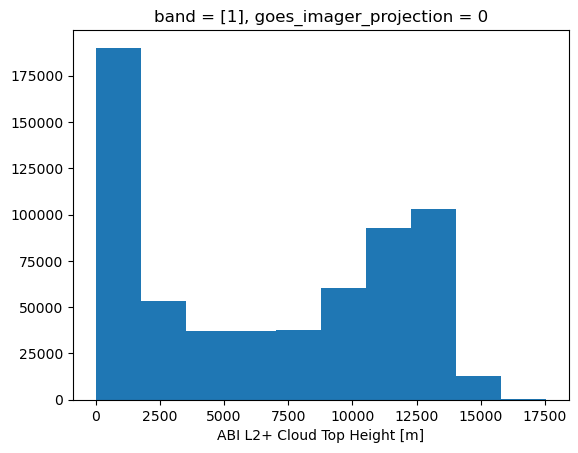

In [23]:
xds['HT'].plot.hist()

## ABI Radiance Data

In [24]:
abi_filenames = glob(abi_filename_regex)
abi_filenames

['/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2020/001/00/OR_ABI-L1b-RadF-M6C08_G16_s20200010000216_e20200010009524_c20200010010002.nc',
 '/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2020/001/00/OR_ABI-L1b-RadF-M6C14_G16_s20200010000216_e20200010009524_c20200010010004.nc',
 '/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2020/001/00/OR_ABI-L1b-RadF-M6C11_G16_s20200010000216_e20200010009524_c20200010009591.nc',
 '/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2020/001/00/OR_ABI-L1b-RadF-M6C05_G16_s20200010000216_e20200010009524_c20200010009585.nc',
 '/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2020/001/00/OR_ABI-L1b-RadF-M6C04_G16_s20200010000216_e20200010009524_c20200010009577.nc',
 '/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2020/001/00/OR_ABI-L1b-RadF-M6C03_G16_s20200010000216_e20200010009524_c20200010009580.nc',
 '/css/geostationary/BackStage/GOES-16-ABI-L1B-FULLD/2020/001/00/OR_ABI-L1b-RadF-M6C01_G16_s20200010000216_e20200010009524_c202000100095

In [25]:
xds = xr.open_dataset(abi_filenames[0], engine="rasterio")
xds

<xarray.Dataset>
Dimensions:                 (band: 1, x: 5424, y: 5424)
Coordinates:
  * band                    (band) int64 1
  * x                       (x) float64 -5.434e+06 -5.432e+06 ... 5.434e+06
  * y                       (y) float64 5.434e+06 5.432e+06 ... -5.434e+06
    goes_imager_projection  int64 ...
Data variables:
    Rad                     (band, y, x) float32 ...
    DQF                     (band, y, x) float32 ...
Attributes: (12/30)
    cdm_data_type:             Image
    Conventions:               CF-1.7
    dataset_name:              OR_ABI-L1b-RadF-M6C08_G16_s20200010000216_e202...
    date_created:              2020-01-01T00:10:00.2Z
    id:                        42818efb-561c-47a4-8143-0e7bf3b16333
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    ...                        ...
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    summary:                   Single emissive band ABI L1b Radiance Products...
    timeline_id:               ABI Mode 6
    time_coverage_end:         2020-01-01T00:09:52.4Z
    time_coverage_start:       2020-01-01T00:00:21.6Z
    title:                     ABI L1b Radiances

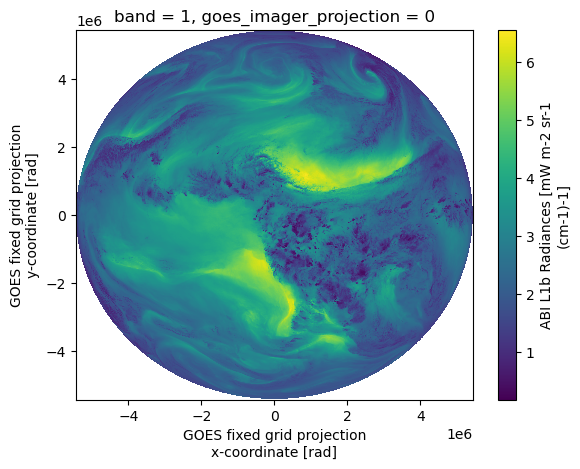

In [26]:
xds['Rad'].plot()

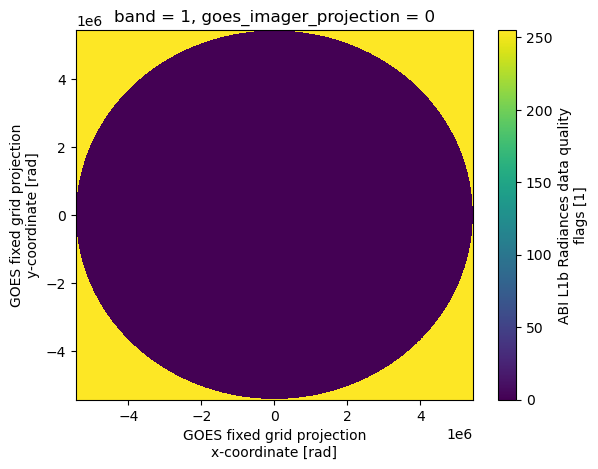

In [27]:
xds['DQF'].plot()

## ABI Radiance Data from AWS

## Convective Masks

In [78]:
xds = xr.open_dataset(convection_filename, engine="rasterio")
xds

/panfs/ccds02/app/modules/jupyter/ilab/pytorch-kernel/lib/python3.9/site-packages/rioxarray/_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


<xarray.Dataset>
Dimensions:      (nt: 72, x: 1751, y: 667)
Coordinates:
  * nt           (nt) float64 0.0 0.3333 0.6667 1.0 ... 22.67 23.0 23.33 23.67
  * x            (x) float64 0.5 1.5 2.5 3.5 ... 1.748e+03 1.75e+03 1.75e+03
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 663.5 664.5 665.5 666.5
    spatial_ref  int64 ...
Data variables:
    DCS_number   (nt, y, x) float64 ...

In [79]:
xds['DCS_number'] = xds['DCS_number'].where(xds['DCS_number'] > 0)

(array([ 201288.,       0.,       0.,       0.,  441908.,       0.,
              0., 1155460.,       0.,  625420.]),
 array([ 3570914. ,  6054514.2,  8538114.4, 11021714.6, 13505314.8,
        15988915. , 18472515.2, 20956115.4, 23439715.6, 25923315.8,
        28406916. ]),
 <BarContainer object of 10 artists>)

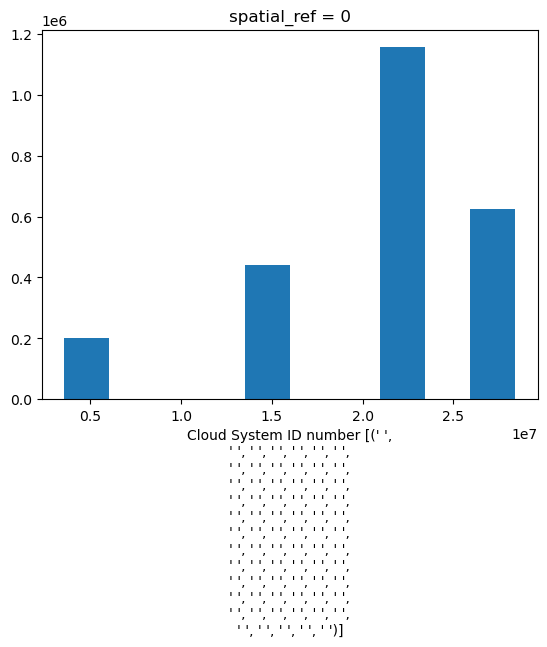

In [80]:
xds['DCS_number'].plot()

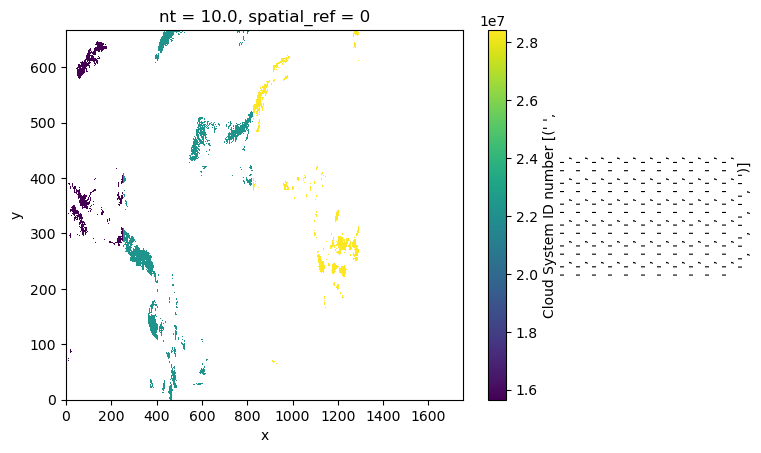

In [81]:
xds['DCS_number'].isel(nt=30).plot()

In [82]:
unique_ids = set()
for timestep in range(xds['DCS_number'].shape[0]):
    unique_ids.update(np.unique(xds['DCS_number'].isel(nt=timestep).values))
              
unique_ids = sorted(unique_ids)
id_to_index = {val: idx for idx, val in enumerate(unique_ids)}    

# This will transform the full array values to 0..N where N = number of unique values
def remap_array(arr, mapping):
    flat = arr.flatten()
    remapped = np.vectorize(mapping.get)(flat)
    return remapped.reshape(arr.shape)

for timestep in range(xds['DCS_number'].shape[0]):
    xds['DCS_number'][timestep, :, :] = remap_array(
        xds['DCS_number'].isel(nt=timestep).values, id_to_index)

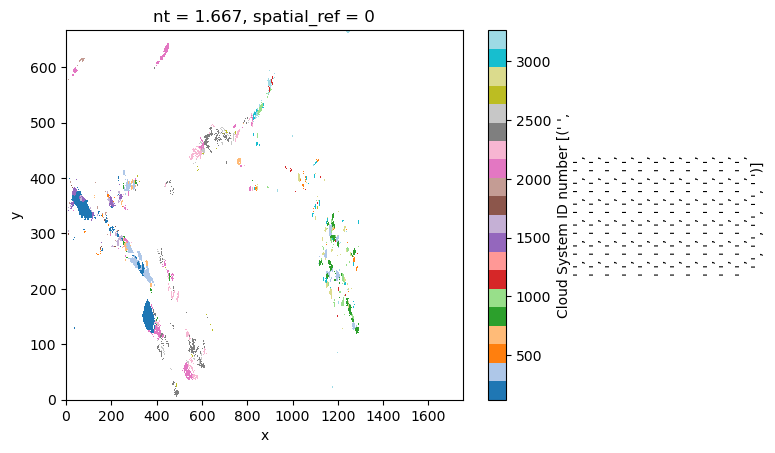

In [86]:
xds['DCS_number'].isel(nt=5).plot(cmap='tab20')

MovieWriter ffmpeg unavailable; using Pillow instead.


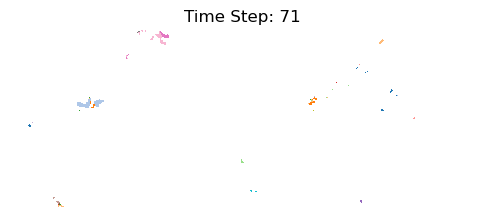

In [93]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as mcolors

# Assume remapped_all is your DataArray of shape (time, y, x)
# e.g., remapped_all = xds['remapped_ids']

# Get global min/max for consistent colormap
vmin = xds['DCS_number'].min().values
vmax = xds['DCS_number'].max().values

# Define colormap: skip 0 (background) and start from 1
n_colors = int(vmax - vmin + 1)
cmap = plt.cm.get_cmap('tab20', n_colors)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Set 0 (background) to yellow
cmap_colors = cmap(np.arange(cmap.N))
cmap_colors[0] = [1.0, 1.0, 0.0, 1.0]  # RGBA for yellow
cmap = mcolors.ListedColormap(cmap_colors)

# Setup figure
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(xds['DCS_number'].isel(nt=0), cmap=cmap, norm=norm)
title = ax.set_title(f"Time Step: 0")
ax.axis("off")

# Update function for animation
def update(frame):
    im.set_array(xds['DCS_number'].isel(nt=frame))
    title.set_text(f"Time Step: {frame}")
    return [im, title]

# Create animation
ani = animation.FuncAnimation(
    fig,
    update,
    frames=xds['DCS_number'].sizes['nt'],
    interval=1,
    blit=True
)

# Save or display
ani.save("animation.gif")#, writer='ffmpeg', dpi=150)
plt.show()
